In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import pymongo

dburl = 'mongodb://localhost:27017/'
mymongo = pymongo.MongoClient(dburl)

mydb = mymongo['kampus']
dosen = mydb['dosen']
mahasiswa = mydb['mahasiswa']

data_dosen = list(dosen.find({},{'_id':0,'asal':1,'nama':1,'usia':1}))
data_mahasiswa = list(mahasiswa.find({},{'_id':0,'asal':1,'nama':1,'usia':1}))

df_dosen = pd.DataFrame(data_dosen)
df_dosen['status']='dosen'
df_mahasiswa = pd.DataFrame(data_mahasiswa)
df_mahasiswa['status']='mahasiswa'

df_dosen = df_dosen.reindex(sorted(df_dosen.columns),axis=1)
df_mahasiswa = df_mahasiswa.reindex(sorted(df_mahasiswa.columns),axis=1)

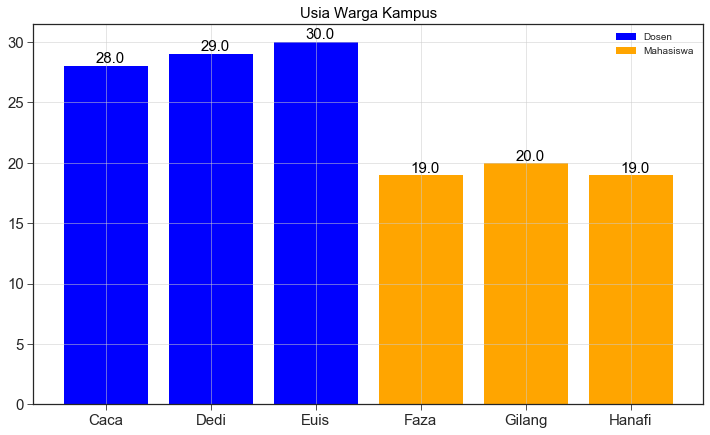

In [66]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(12,7))
plt.title('Usia Warga Kampus',color='black', size= 15)

plt.bar(df_dosen['nama'],df_dosen['usia'],color='blue',label='Dosen',zorder=-1)
plt.bar(df_mahasiswa['nama'],df_mahasiswa['usia'],color='orange',label='Mahasiswa',zorder=-1)
plt.legend()

plt.xticks(size=15)
plt.yticks(size=15)
plt.grid(True)

for i,v in enumerate(x):
    plt.text(v.get_x()+0.3,v.get_height()*1.01,df_dosen.iloc[i]['usia'],color='black',fontsize=15)
    
for i,v in enumerate(y):
    plt.text(v.get_x()+0.3,v.get_height()*1.01,df_mahasiswa.iloc[i]['usia'],color='black',fontsize=15)

plt.show()